In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()
totalByMonth

Reported_Date
April        10418
August       11746
December      9417
February      8877
January      10191
July         11489
June         11487
March        10796
May          11693
November      9955
October      11990
September    10879
Name: Reported_Date, dtype: int64

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()

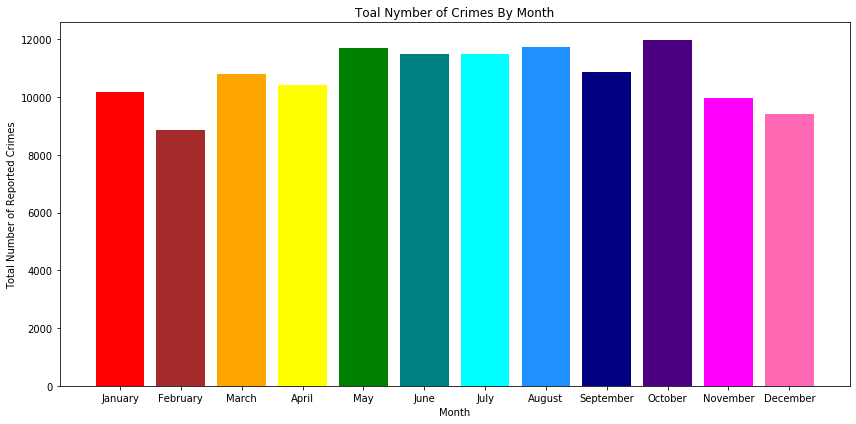

In [8]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(12,6))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Toal Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.show()

# Types of Crimes by Month

In [132]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy = copy.replace({'Agg Assault - Domest': 'Aggravated Assault', 'Aggravated Assault (': 'Aggravated Assault', 'Agg Assault': 'Aggravated Assault', 'agg assault': 'Aggravated Assault',
                     'AGG ASSAULT': 'Aggravated Assault', 'Agg Assault - Drive-': 'Aggravated Assault', 'Arson with Fire Bomb': 'Arson', 'Attempt Suicide by D': 'Suicide',
                     'Attempt Suicide by G': 'Suicide', 'Attempt Suicide by H': 'Suicide', 'Attempt Suicide by J': 'Suicide', 'Attempt Suicide by O': 'Suicide', 'Attempt Suicide by P': 'Suicide',
                     'Attempt Suicide by S': 'Suicide', 'Suicide By Hanging': 'Suicide', 'Suicide By Jumping': 'Suicide', 'Suicide By Shooting': 'Suicide', 'Suicide By Sleeping': 'Suicide', 
                     'Suicide by Other Mea': 'Suicide', 'Attempt Suicide by C': 'Suicide','Forged Checks': 'Forgery', 'Fraud/Confidence Gam': 'Forgery', 'Gambling - Possessio': 'Forgery',
                     'Stealing All Other': 'Stealing', 'Stealing Auto Parts': 'Stealing', 'Stealing Auto Parts/': 'Stealing', 'Stealing Bicycles': 'Stealing', 'Stealing Coin Operat': 'Stealing', 
                     'Stealing From Auto': 'Stealing', 'Stealing Pickpocket': 'Stealing', 'Stealing Purse Snatc': 'Stealing', 'Stealing Shoplifting': 'Stealing', 'Stealing from Buildi': 'Stealing',
                     'Stolen Property OFFE': 'Stealing', 'stealing': 'Stealing', 'stealing from buildi': 'Stealing', 'Sex Off Follow/Entic': 'Sexual Assault', 'Sex Off Fondle - mol': 'Sexual Assault',
                     'Sex Off Incest': 'Sexual Assault', 'Sex Off Indecent Con': 'Sexual Assault', 'Sex Off Indecent Exp': 'Sexual Assault', 'Sex Off Misconduct': 'Sexual Assault', 'Sex Offense -others': 'Sexual Assault', 
                     'Sexual Assault with': 'Sexual Assault', 'Rape': 'Sexual Assault', 'Forcible Fondling': 'Sexual Assault', 'Statutory Rape': 'Sexual Assault', 'Counterfeiting': 'Fraud', 'Embezzlement': 'Fraud',
                    'Passing Bad Checks': 'Fraud', 'Welfare Fraud': 'Fraud', 'Wire Fraud': 'Fraud', 'Strong Arm Robbery': 'Armed Robbery', 'Business Robbery': 'Robbery', 'property damage': 'Property Damage',
                     'False ID': 'Identity Theft', 'False Information to': 'Identity Theft', 'Auto Theft Outside S': 'Auto Theft', 'Burglary - Non Resid': 'Burglary', 'Burglary - Residence': 'Burglary',
                     'Bomb Threat/Intimida': 'Threat', 'Bombing (other than': 'Threat',  'Impersonation - NOT': 'Identity Theft', 'Dumping (littering)': 'Littering', 'TRASH DUMPING': 'Littering',
                     'Possession of Drug E': 'Possesion', 'Possession/Sale/Dist': 'Possesion', 'Violation Ex Parte O': 'Violation', 'Violation Full Order': 'Violation', 'Weapons Law Violatio': 'Violation',
                    'TRESPASS': 'Tresspassing', 'Prostitution/Patroni': 'Prostitution', 'Prostitution/Solicit': 'Prostitution', 'Promoting Prostituti': 'Prostitution', 'Liquor Law Violaton': 'Violation',
                    'Non Agg Assault Dome': 'Non Aggrevated Assault', 'Non Aggravated Assau': 'Non Aggrevated Assault', 'non aggravated assau': 'Non Aggrevated Assault', 'forgery': 'Forgery', 'misc violation': 'Violation'})
copy

,Reported_Date,Description,Month
0,2018-09-02,Burglary,September
1,2018-01-31,Forgery,January
2,2018-01-30,Sexual Assault,January
3,2018-01-30,Burglary,January
4,2018-12-08,Property Damage,December
...,...,...,...
128933,2018-12-23,HOMICIDE/Non Neglige,December
128934,2018-12-27,Stealing,December
128935,2018-12-29,Burglary,December
128936,2018-12-25,Non Aggrevated Assault,December


In [133]:
typesofCrime = copy.groupby(['Month','Description'])['Reported_Date'].count()
typesofCrime

Month      Description           
April      Aggravated Assault         891
           Armed Robbery              316
           Arson                       48
           Auto Theft                 719
           Bribery                      2
           Burglary                   714
           Credit/Debit/ATM Car        96
           Dead Body                    6
           Disorderly Conduct         160
           Driving Under Influe        79
           Family Disturbance           2
           Family Offense              48
           Forcible Sodomy             35
           Forgery                    226
           Fraud                       53
           HOMICIDE/Non Neglige        28
           Hacking/Computer Inv         4
           Hit and Run of a Per         5
           Human Trafficking/Co         4
           Identity Theft             147
           Interference with Cu        18
           Intimidation               193
           Kidnapping/Abduction        13


In [134]:
crime = pd.DataFrame(typesofCrime).reset_index()
crime

,Month,Description,Reported_Date
0,April,Aggravated Assault,891
1,April,Armed Robbery,316
2,April,Arson,48
3,April,Auto Theft,719
4,April,Bribery,2
5,April,Burglary,714
6,April,Credit/Debit/ATM Car,96
7,April,Dead Body,6
8,April,Disorderly Conduct,160
9,April,Driving Under Influe,79


In [135]:
crime = crime.pivot(index='Month', columns='Description', values='Reported_Date')
crime

Description,Accidental Drug Over,Aggravated Assault,Animal Bite - Dog,Animal Cruelty,Armed Robbery,Arson,Auto Theft,Bribery,Burglary,Casualty (includes a,...,Threat,Trespassing,Tresspassing,URINATE IN PUBLIC,Violation,Withhold Property,`,black mail,misc,misc violation
Month,,,,,,,,,,,,,,,,,,,,,
April,NaN,891.0,NaN,NaN,316.0,48.0,719.0,2.0,714.0,NaN,...,10.0,285.0,2.0,NaN,222.0,4.0,NaN,NaN,NaN,NaN
August,3.0,916.0,NaN,NaN,582.0,49.0,913.0,NaN,813.0,3.0,...,16.0,335.0,NaN,NaN,222.0,NaN,NaN,NaN,NaN,NaN
December,NaN,741.0,NaN,NaN,358.0,25.0,674.0,NaN,636.0,4.0,...,19.0,295.0,NaN,NaN,139.0,NaN,NaN,2.0,NaN,NaN
February,NaN,617.0,NaN,NaN,275.0,35.0,834.0,NaN,597.0,1.0,...,NaN,271.0,NaN,NaN,135.0,NaN,NaN,NaN,1.0,NaN
January,NaN,839.0,NaN,2.0,513.0,70.0,998.0,NaN,657.0,NaN,...,4.0,226.0,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN
July,NaN,951.0,NaN,NaN,493.0,45.0,848.0,NaN,821.0,NaN,...,10.0,372.0,NaN,NaN,192.0,NaN,NaN,NaN,NaN,NaN
June,NaN,1072.0,1.0,5.0,429.0,36.0,848.0,NaN,692.0,NaN,...,17.0,316.0,NaN,NaN,170.0,NaN,1.0,NaN,NaN,NaN
March,NaN,851.0,NaN,1.0,430.0,36.0,869.0,NaN,802.0,1.0,...,11.0,355.0,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN
May,NaN,947.0,NaN,NaN,426.0,33.0,919.0,NaN,800.0,NaN,...,18.0,289.0,NaN,NaN,197.0,NaN,NaN,NaN,NaN,NaN


In [136]:
crime.columns.values

array(['Accidental Drug Over', 'Aggravated Assault', 'Animal Bite - Dog',
       'Animal Cruelty', 'Armed Robbery', 'Arson', 'Auto Theft',
       'Bribery', 'Burglary', 'Casualty (includes a',
       'Credit/Debit/ATM Car', 'Curfew', 'Dead Body',
       'Disorderly Conduct', 'Driving Under Influe', 'Drunkenness',
       'Extortion/Blackmail', 'Failure to Return', 'Family Disturbance',
       'Family Offense', 'Forcible Sodomy', 'Forgery', 'Fraud',
       'HOMICIDE/Non Neglige', 'Hacking/Computer Inv',
       'Hit and Run of a Per', 'Human Trafficking/Co', 'Identity Theft',
       'Interference with Cu', 'Intimidation', 'Justifiable Homicide',
       'Kidnapping/Abduction', 'Littering', 'Loitering', 'Misc Offense',
       'Misc Violation', 'Missing/Runaway Juve', 'Non Aggrevated Assault',
       'Peeping Tom', 'Pornography', 'Possesion', 'Property Damage',
       'Prostitution', 'Resisting an Officer', 'Robbery',
       'Sexual Assault', 'Stalking', 'Stealing', 'Suicide', 'Threat',
    

In [ ]:
# month = crime['Month']
# for num, month in enumerate(month):
#     values = list(crime[crime['Month'] == month].loc[:, 'Value'])

#     crime[crime['Month'] == month].plot.bar(x=crime['Description'],y=crime['Reported_Date'], ax=ax, stacked=True, 
#                                     bottom = margin_bottom, color=colors[num], label=month)
#     margin_bottom += values
# plt.show()

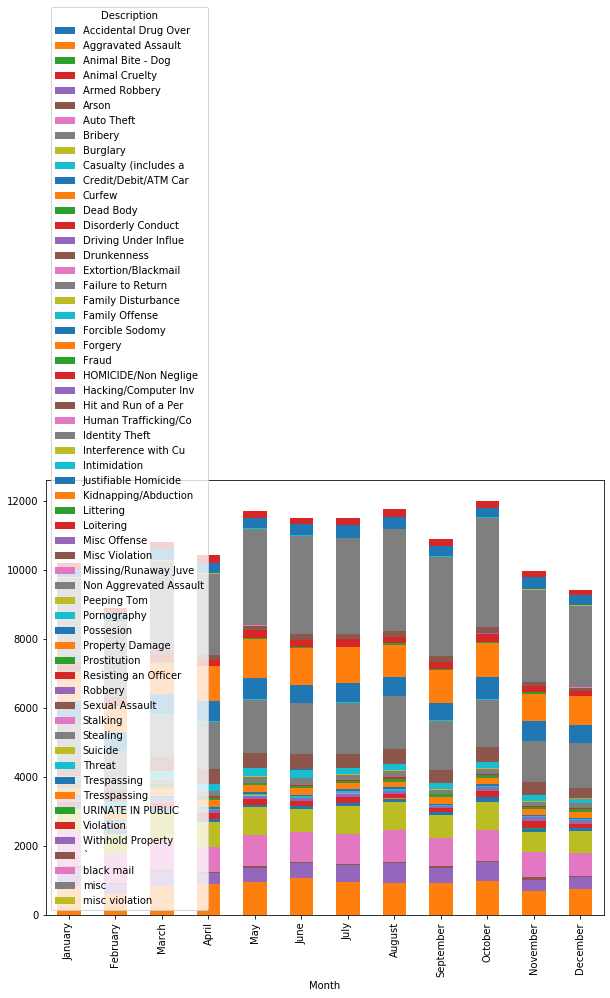

In [139]:
types = [ 'Agg Assault - Domest', 'Aggravated Assault (', 'Armed Robbery', 'Auto Theft', 'Burglary - Non Resid', 'Burglary - Residence', 'Disorderly Conduct', 'Driving Under Influe',  'Fraud/Confidence Gam', 'Identity Theft', 'Intimidation', 'Kidnapping/Abduction', 'Liquor Law Violaton', 'Non Agg Assault Dome', 'Non Aggravated Assau', 'Possession/Sale/Dist', 'Property Damage', 'Sex Off Fondle - mol', 'Stealing All Other', 'Stealing Auto Parts/', 'Stealing From Auto', 'Stealing Shoplifting', 'Stealing from Buildi', 'Trespassing', 'Violation Full Order', 'Weapons Law Violatio']
crime.loc[months, :].plot.bar(stacked=True, figsize=(10,8))
plt.show()